# 1 Author

### Student Name: Meriam saad kharchef

### Student ID: 221055119

# 2 Problem formulation

Thanks to the contribution of all students we manage to gather more than 2000 sound data sets. by filming in different spots/locations throughout London indoors and outdoors. With the type of data collected and labelled, a classification problem would best serve the purpose of the dataset.


coming to the Advanced solution. we need to build a Machine Learning model or pipeline that takes as an input an audio segment and predicts whether the audio segment is recorded by a voice of a male or female


in order to find a solution for this problem we will need to work with some features like need to extract some features
for example: we will use 
Power 

Pitch mean.

Pitch standard deviation.

Voiced FR

MFCCs 

Chromagram

Mel spectogram


what interests me the most about this is that we will be able to produce a model that will be able to detect if a sound is recorded by a male or female  which amazing imagine if your phone, car etc would unlock by just recognising your voice. It is not very similar to what we are going to do but it plays a huge part of it


# 3 Machine Learning pipeline

Now coming to the machine learning pipeline at first, we get our sample data. When we have our raw data, we might notice some files are corrupted or have bad structure, so it is better to remove these files this is “called data cleaning”. Then we will extract the features that are the input to the model. Then we train our data by splitting it. We can use different ML models and compare to see which one gives best/accurate results.

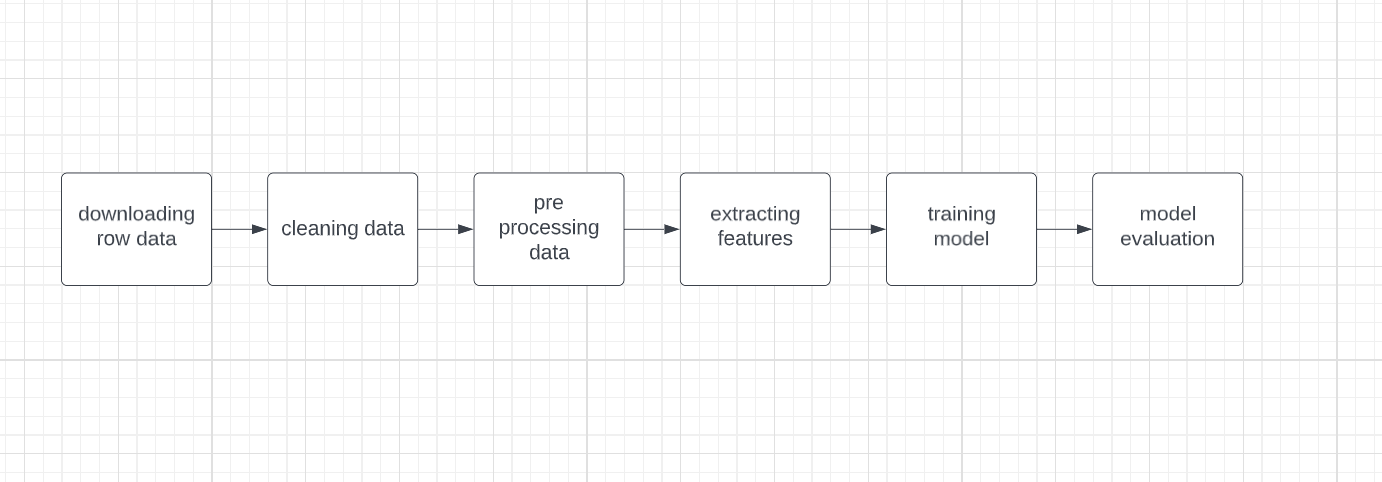

# 4 Transformation stage

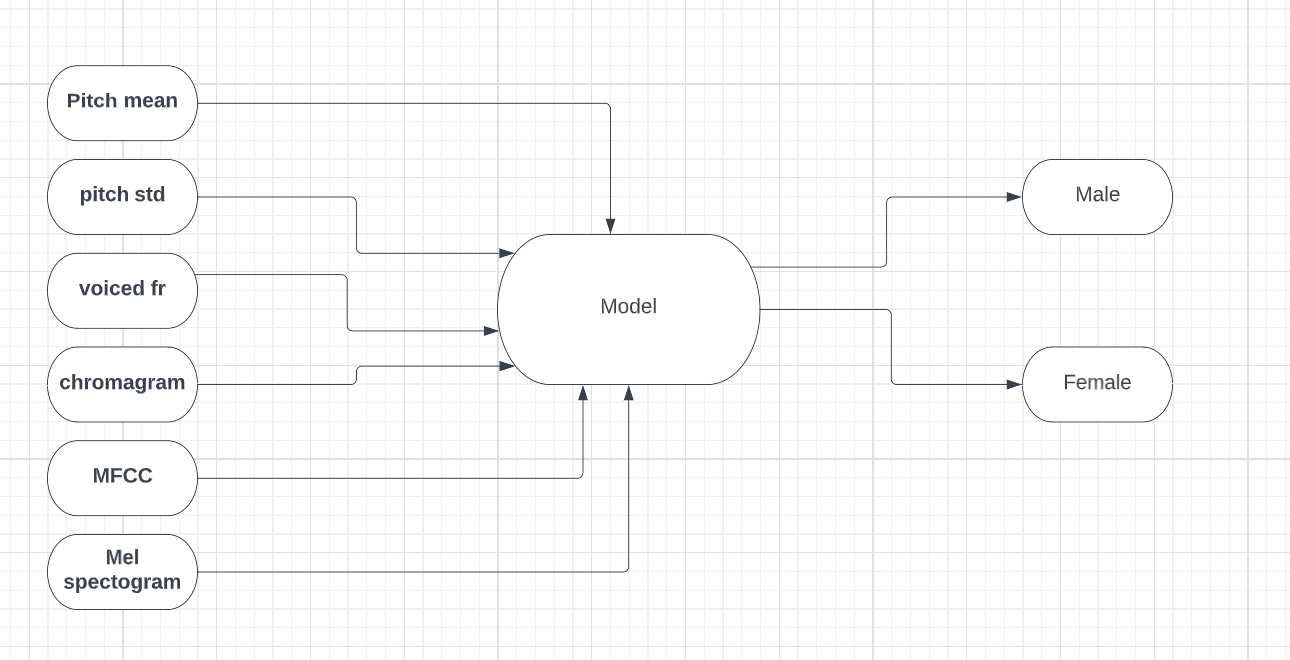

In order to build ML pipeline that takes an input an audio segment and predicts whether the audio segment has been recorded by male or female. We will be using the following features: Power, Pitch mean, Pitch standard deviation, MFCC and chromagram mel spectrogram  .

# 5 Modelling

### 1 First model (SVM):
Support vector machine The first model I applied was the SVM model. The concept of support vector machine is basic the algorithm makes a line that divides our chosen data into classes. We can find this in the sklearn library, and it can be imported and be implemented

### 2 Random forest classifier:
The random forest classifier is a classifiair that has several decisions trees in different subsets of the data set. It improves predictability of the data set by taking the average.

MLP Classifier:

### 3	MLP Classifier
Multi-layer Perceptron classifier in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Random Forrest Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.
One similarity though, with Scikit-Learn’s other classification algorithms is that implementing MLPClassifier takes no more effort than implementing Support Vectors or RF or any other classifiers from Scikit-Learn.
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

### 4 The k-nearest neighbors 

k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.


# 6 Methodology

In order to train out model we need to split our data by splitting 80% this is sone by using “train_test_split” and for the validation we will be using the other 20% of the remaining data. When we are done with the feature extraction our data will be passed through the models. Now when the models are trained, we will be using theses models to make the predictions on the validated data. In order to evaluate the performance of our model we will be implementing the accuracy measure. So, in order to have a better view of the model we will print out the confusion matrix

# 7 Dataset


### Importing libraries and loading the data



In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import random

import urllib.request
import zipfile
import IPython.display as ipd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/*.wav'
files = glob.glob(sample_path)
len(files)

637

### Data Cleaning

We are going to be using our data from MLEnd London Sounds dataset for indoors and outdoors environment. This data is uploaded to my google drive and it will be extracted from the drive. When going through the data it has come to my notice that some of the audio files where corrupted/malformed, so we had to remove them in order for the process to work. These files will degrade performance of the model. Therefore data cleaning is very important step to go through while building a machine learning pipeline

so in order to proced to the next this code below will delete any file that is corrupted or has bad structure 

In [132]:
path = '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/2025.wav'
  
# Remove the specified 
# file path
try:
    os.remove(path)
    print("% s removed successfully" % path)
except OSError as error:
    print(error)
    print("File path can not be removed")

[Errno 2] No such file or directory: '/content/drive/MyDrive/Data/MLEndLS/sample/MLEndLS_Sample/2025.wav'
File path can not be removed


### Loading the CSV file

i have added a new column that is the "Gender" which will assign Female or Male value to every audio in the CSV file

In [5]:
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant,Gender
file_id,,,,,
0015.wav,campus,reception,indoor,S99,Female
0489.wav,westend,charing,indoor,S99,Female
0542.wav,kensington,albert,outdoor,S99,Female
0559.wav,westend,market,indoor,S99,Female
0576.wav,kensington,dinosaur,indoor,S99,Female
...,...,...,...,...,...
1545.wav,kensington,dinosaur,indoor,S1,Female
1603.wav,kensington,hintze,indoor,S1,Female
2059.wav,campus,curve,indoor,S1,Female


### the unique values in all columns of our CSV file

In [6]:
for col in MLENDLS_df:
  print(MLENDLS_df[col].unique())

['campus' 'westend' 'kensington' 'Euston' 'southbank' 'british']
['reception' 'charing' 'albert' 'market' 'dinosaur' 'ground' 'curve'
 'library' 'leicester' 'piazza' 'canal' 'square' 'national' 'cromwell'
 'trafalgar' 'marine' 'upper' 'gardens' 'forecourt' 'royal' 'book' 'food'
 'bridge' 'waterloo' 'skate' 'greatcourt' 'room12' 'street' 'ritblat'
 'hintze' 'pond' 'room13']
['indoor' 'outdoor']
['S99' 'S97' 'S96' 'S95' 'S94' 'S93' 'S92' 'S91' 'S90' 'S9' 'S89' 'S88'
 'S87' 'S86' 'S85' 'S84' 'S83' 'S82' 'S81' 'S80' 'S8' 'S79' 'S78' 'S77'
 'S76' 'S75' 'S74' 'S73' 'S72' 'S71' 'S7' 'S69' 'S68' 'S67' 'S66' 'S65'
 'S64' 'S63' 'S62' 'S61' 'S60' 'S6' 'S59' 'S58' 'S57' 'S56' 'S55' 'S54'
 'S52' 'S51' 'S50' 'S5' 'S49' 'S48' 'S47' 'S46' 'S45' 'S43' 'S42' 'S41'
 'S40' 'S4' 'S39' 'S38' 'S37' 'S36' 'S35' 'S34' 'S32' 'S31' 'S30' 'S3'
 'S29' 'S28' 'S27' 'S26' 'S25' 'S24' 'S23' 'S22' 'S21' 'S20' 'S193' 'S192'
 'S191' 'S190' 'S19' 'S189' 'S187' 'S186' 'S185' 'S184' 'S183' 'S182'
 'S181' 'S18' 'S179' 'S178'

### plotting the signal for one of our audio

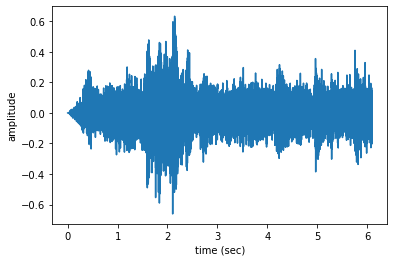

In [7]:
n=0
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

### checking if the plotted signal agreees with the values shown in the MLENDLS_df dataframe

In [8]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area             westend
spot           leicester
in_out           outdoor
Participant          S75
Gender            Female
Name: 0830.wav, dtype: object

## setting the feature and Extracting the features from the data

In [9]:
n=0
x, fs = librosa.load(files[n],sr=fs)
print('This audio signal has', len(x), 'samples')

This audio signal has 269010 samples


### this function below will Create a function to extract the pitch of an audio file

In [10]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

### The function below will attach true labels for Female audio and false labels for Male audio The label matrixx will an array that has true and false values that indicate indoor or outdoor sample

In [11]:

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      # labels created are the Gender for whatever audio files are passed in
      yi = labels_file.loc[fileID]['Gender']=='Female' 

    

      #Load an audio file as a floating point time series.
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)

      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      # calculating features given beforehand
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)
      
      
      # get chroma stft
      chroma = librosa.feature.chroma_stft(x, sr=fs)
      chroma_mean = np.nanmean(chroma) #if np.mean(np.isnan(chroma))<1 else 0
      # get sftf
      stft = librosa.stft(x)
      Xdb = librosa.amplitude_to_db(abs(stft))
      Xdb_mean = np.nanmean(Xdb) #if np.mean(np.isnan(Xdb))<1 else 0
      # get zero corssing rate
      zero = librosa.feature.zero_crossing_rate(x, pad=False)
      zero_mean = np.nanmean(zero)  
      # get mfcc 
      mfcc = librosa.feature.mfcc(x)
      mfcc_mean = np.nanmean(mfcc)
      # get spectral centroid
      spec_cent = librosa.feature.spectral_centroid(x, sr=fs)
      spec_cent_mean = np.nanmean(spec_cent)

      # get spectral roll
      roll_off = librosa.feature.spectral_rolloff(x, sr=fs)
      roll_off_mean = np.nanmean(roll_off)

      # get chroma stft
      chroma_cqt = librosa.feature.chroma_cqt(x, sr=fs)
      chroma_cqt_mean = np.nanmean(chroma_cqt)


        
      # appends all the values for each calculated feature to an array
      xi = [power, pitch_mean, pitch_std, voiced_fr, chroma_mean, Xdb_mean, zero_mean, mfcc_mean, spec_cent_mean, roll_off_mean, chroma_cqt_mean]
      X.append(xi)
      y.append(yi)

  return np.array(X),np.array(y)
     

### Extracting features in array x and lables to array y by using getXy function that we made in the last step

In [12]:
# extracting featues for files
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=False, onlySingleDigit=True)

 62%|██████▏   | 392/637 [08:17<04:47,  1.17s/it]/usr/local/lib/python3.8/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
100%|██████████| 637/637 [13:21<00:00,  1.26s/it]


### The next cell shows the shape of X and y and prints the labels vector y:

In [13]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)

The shape of X is (637, 11)
The shape of y is (637,)
The labels vector is [ True  True False False  True False False False False False  True False
 False  True False False  True  True  True  True False  True False False
 False False False False  True  True False  True  True False False False
 False False  True  True False False False False  True False False  True
 False  True  True False  True False  True False False  True False False
 False  True False False False False  True False  True  True  True False
  True  True False False False False  True False False False False  True
  True False  True  True  True  True  True  True  True False  True  True
 False False False False  True False  True  True False False  True  True
 False  True False  True False False False  True  True  True False False
  True False  True False False False  True  True False  True False False
 False False False  True  True False  True  True False False False  True
  True  True False  True False False False  True  

In [14]:
print(' The number of Female recordings is ', np.count_nonzero(y))
print(' The number of Male recordings is ', y.size - np.count_nonzero(y))

 The number of Female recordings is  267
 The number of Male recordings is  370


# Comparing diffrent ML models performance

# 1 SVM: Support Vector Machine 

### firstly we are Splitting our data into 80% train and 20% test size

In [15]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
X_train[0]

array([ 1.13337192e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.97584373e-01, -2.91961460e+01,  5.54574534e-02, -5.37261820e+00,
        2.02581443e+03,  3.46422370e+03,  5.85361362e-01])

In [16]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0],-1)

In [37]:
model  = svm.SVC(C=9)
model.fit(X_train,y_train)
import pickle

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)


Training Accuracy 0.6326129666011788
Validation  Accuracy 0.65625
The support vectors are (439, 11)


We can see the validation and training of the SVM model is complete. We set the value for C=9 which gives us the following results:

Training accuracy: 63%

Validation accuracy: 65%



##  Normalizing our data and observing a change in the accuracy

In [38]:
mean = X_train.mean()
sd =  X_train.std()

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_pn = model.predict(X_train)
yv_pn = model.predict(X_val)

print('Training Accuracy', np.mean(yt_pn==y_train))
print('Validation  Accuracy', np.mean(yv_pn==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7170923379174853
Validation  Accuracy 0.671875
The support vectors are (447, 11)


# 2 Second RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=6, random_state=45) 
clf = RandomForestClassifier(max_depth=18, random_state=50)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, random_state=50)

In [34]:
yt_p1 = clf.predict(X_train)
yv_p1 = clf.predict(X_val)
print('Training Accuracy', np.mean(yt_p1==y_train))
print('Validation  Accuracy', np.mean(yv_p1==y_val))

Training Accuracy 0.9921414538310412
Validation  Accuracy 0.734375


In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p1)

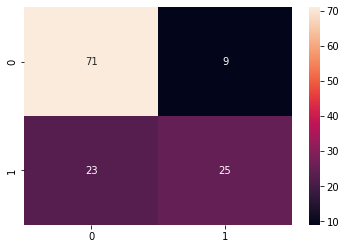

In [35]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)

# 3 MLP Classifier

In [24]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(256, ), random_state=60)
clf_mlp.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256,), random_state=60,
              solver='sgd')

In [25]:
yt_p_mlp = clf_mlp.predict(X_train)
yv_p_mlp = clf_mlp.predict(X_val)

print('Training Accuracy', np.mean(yt_p_mlp==y_train))
print('Validation  Accuracy', np.mean(yv_p_mlp==y_val))

Training Accuracy 0.5579567779960707
Validation  Accuracy 0.609375


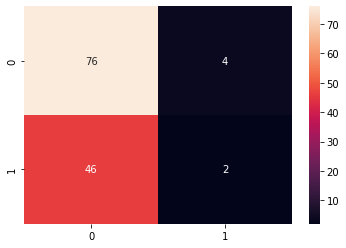

In [26]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, yv_p_mlp)
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)
     

# K Nearest Neighbors

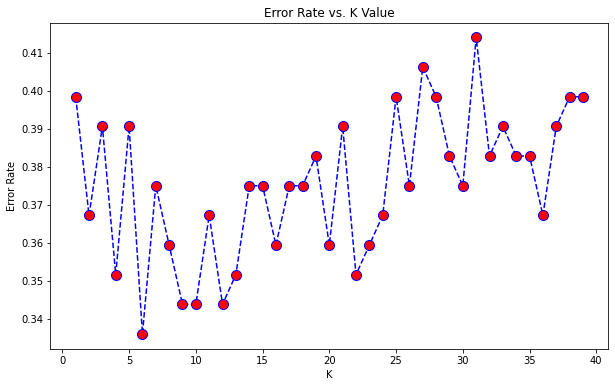

In [27]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [28]:
# now using the model with the optimal n_neighbors
knn = KNeighborsClassifier(n_neighbors=14)
# fitting
knn.fit(X_train, y_train)
# predicting
yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')


Training Accuracy 0.68762278978389
Validation  Accuracy 0.625




# 9 Conclusions

In [40]:
import pandas as pd

data = [['SVM',np.mean(yt_p == y_train), np.mean(yv_p == y_val)], ['Random Forrest',np.mean(yt_p1==y_train), np.mean(yv_p1==y_val)], ['knn',np.mean(yt_p==y_train), np.mean(yv_p==y_val)], ['MLP', np.mean(yt_p_mlp==y_train), np.mean(yv_p_mlp==y_val)]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Classifier', 'Performance Training', 'Performance Testing'])

# print dataframe.
df
     

,Classifier,Performance Training,Performance Testing
0,SVM,0.632613,0.656250
1,Random Forrest,0.992141,0.734375
2,knn,0.632613,0.656250
3,MLP,0.557957,0.609375


In conclusion we have tested/evaluated 2 classifiers that are Support Vector Machine and Random Forest Classifier, MLP and KNN nearest neighbours in the basic solution we only used SVM and random forest classifier. We fitted these models to the training sets that is constructed from our features that were taken from our sound data set. When validating the model, we can see that the best performance that had the best outcomes was from the random forest classifier that gave the highest validation accuracy as we can see in the table above.